# `nres`: A Simple Yet Powerful Tool for Fitting Neutron Resonances

**Author:** Tsviki Y. Hirsh  
**Date:** Sep 23rd, 2024

## Overview

This Jupyter notebook demonstrates the capabilities of `nres`, a Python package designed for quick and easy quantitative fitting of total cross-section for neutron absorption resonances transmission spectrum in the epithermal and fast energy regions.

## Learning Objectives

By the end of this tutorial, you will be able to:

1. Define sample materials using `nres`'s built-in databases
2. Load and prepare experimental data for analysis
3. Create and customize transmission models
4. Adjust fit parameters for optimal results
5. Visualize and interpret fit results

## Notebook Contents

1. **Introduction to `nres`**
   - Package overview
   - Key features and capabilities

2. **Defining Sample Materials**
   - Using built-in material and element libraries
   - Creating custom material compositions

3. **Loading Experimental Data**
   - Importing transmission data
   - Data format requirements and preprocessing

4. **Creating a Transmission Model**
   - Basic model setup
   - Adding response functions and background

5. **Fitting Process**
   - Setting initial parameters
   - Defining parameter constraints
   - Running the fit

6. **Tweaking Fit Parameters**
   - Strategies for improving fit quality
   - Handling challenging datasets

7. **Visualizing Results**
   - Plotting fit results
   - Interpreting output parameters

8. **Advanced Topics** (Optional)
   - Handling multiple isotopes
   - Incorporating complex backgrounds
   - Exporting results for further analysis

## Prerequisites

- Basic knowledge of Python
- Familiarity with neutron scattering concepts
- Installed `nres` package and its dependencies

Let's begin our journey into the world of neutron resonance fitting with `nres`!

## install
To install simply clone the nres repo then install using pip

```bash
git clone http://github.com/tsvikihirsh/nres
cd nres
pip install .
```

This will install the nres package and you should be able to import `nres`

In [1]:
import nres

# TLDR - quick fit

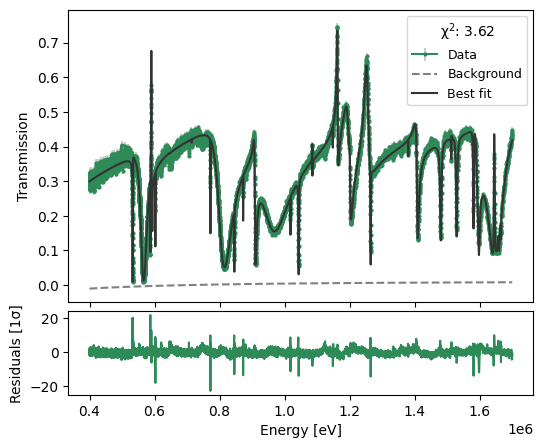

In [18]:
# define material
Si = nres.CrossSection("Silicon")

# load data
data = nres.Data.from_transmission("silicon.dat") 

# define model
model = nres.TransmissionModel(Si,vary_background=True)

# fit using lmfit
result = model.fit(data,emin=0.4e6,emax=1.7e6) 

# plot fit results
result.plot();

In [19]:
# show best fit parameters
result

# Defining Sample Materials in nres

## Introduction
Before fitting neutron resonances, you need to define the materials and elements in your sample. nres provides a simple interface for defining complex combinations of isotopic materials.

## Built-in Material Libraries

nres includes several built-in libraries for easy material definition:

1. **Standard Materials Library**
   - Based on PNNL materials compendium
   - Available as a dictionary: `nres.materials`
   - Example: Concrete (Portland type)

2. **Elements Library**
   - Contains all natural abundance elements
   - Available as a dictionary: `nres.elements`

3. **Isotopes Library**
   - Contains individual isotopes
   - Available as a dictionary: `nres.isotopes`

## Cross Section Data Source

- Cross section data is taken from ENDF8.0
- Uses the precompiled [trinidi-data](https://github.com/lanl/trinidi-data) database

## Defining Materials

While manual material definition is possible, this demo focuses on using the built-in databases.

### Exploring Available Materials

To see the list of available materials:

1. In a Jupyter notebook cell, type:
   ```python
   nres.materials["
   ```
   Then hit the Tab key to see autocomplete options.

2. Alternatively, use:
   ```python
   list(nres.materials.keys())
   ```
   This will display the full list of available materials.

### Example: Viewing a Material Entry

Let's look at the entry for Concrete (Portland type):

```python
print(nres.materials["Concrete, portland"])
```

This will display the composition and properties of Portland concrete as defined in the nres materials database.

## Next Steps

After defining your materials:
- Create CrossSection objects for each material
- Combine materials if your sample contains multiple components
- Prepare to incorporate these materials into your fitting model

In the following sections, we'll demonstrate how to use these material definitions in creating a neutron resonance fitting model.

In [20]:
nres.materials["Concrete, Portland"]

{'name': 'Concrete, Portland',
 'density': 2.3,
 'n': 0.081429,
 'mass': 17.00990473321826,
 'formula': 'None',
 'elements': {'H': {'weight': 0.16875324038006784,
   'mass': 1.007975,
   'isotopes': {'H-1': 0.168734, 'H-2': 1.9e-05}},
  'C': {'weight': 0.0014162410493405732,
   'mass': 12.0106,
   'isotopes': {'C-12': 0.001401, 'C-13': 1.5e-05}},
  'O': {'weight': 0.5625248241235286,
   'mass': 15.9994,
   'isotopes': {'O-16': 0.561158, 'O-17': 0.000214, 'O-18': 0.001153}},
  'Na': {'weight': 0.011838243030656384,
   'mass': 22.989769,
   'isotopes': {'Na-23': 0.011838}},
  'Mg': {'weight': 0.0013996753613140969,
   'mass': 24.3055,
   'isotopes': {'Mg-24': 0.001106, 'Mg-25': 0.00014, 'Mg-26': 0.000154}},
  'Al': {'weight': 0.021353841390382294,
   'mass': 26.981538,
   'isotopes': {'Al-27': 0.021354}},
  'Si': {'weight': 0.20411946262451217,
   'mass': 28.085,
   'isotopes': {'Si-28': 0.188245, 'Si-29': 0.009563, 'Si-30': 0.006311}},
  'K': {'weight': 0.005655712952065142,
   'mass': 

In a similar way, the `nres.elements` contains a database of all known elements and their isotopic properties.

To get a list of available elements, just write 
```python
nres.elements["
``` 
and hit the tab button. 

In [21]:
nres.elements["Tungsten"]

{'name': 'Tungsten',
 'n': 0.06322199557658834,
 'mass': 183.84,
 'formula': 'W',
 'density': 19.3,
 'elements': {'W': {'weight': 1,
   'isotopes': {'W180': 0.0012,
    'W182': 0.265,
    'W183': 0.1431,
    'W184': 0.3064,
    'W186': 0.2843}}}}

To load the cross section of any material add the material name into `nres.CrossSection`

In [29]:
concrete = nres.CrossSection(nres.materials["Concrete, Portland"])

# or simply

concrete = nres.CrossSection("Concrete, Portland")

# or you can specify a shorter name with

concrete = nres.CrossSection(portland = nres.materials["Concrete, Portland"])

The cross section table is accessible through the `.table` method and can be directly plotted through the `.plot()` call

in 'nres` the energy units are always in $eV$, and the cross section are always givn in units of barns (10$^{-24}$ cm$^2$)


In [30]:
concrete.table

,H,C,O,Na,Mg,Al,Si,K,Ca,Fe,total
energy,,,,,,,,,,,
1.000000e-05,198.621739,0.108772,30.338676,0.791922,0.041571,0.585899,5.170980,0.622079,0.783039,0.805659,51.683493
1.031250e-05,195.589856,0.107117,29.877403,0.779874,0.040941,0.576990,5.092443,0.612596,0.771151,0.793432,50.895681
1.034854e-05,195.255749,0.106934,29.826574,0.778546,0.040871,0.576008,5.083789,0.611551,0.769841,0.792085,50.808867
1.062500e-05,192.692838,0.105535,29.436667,0.768362,0.040338,0.568477,5.017401,0.603534,0.759791,0.781750,50.142923
1.069707e-05,192.053569,0.105186,29.339416,0.765822,0.040205,0.566598,5.000843,0.601535,0.757285,0.779172,49.976818
...,...,...,...,...,...,...,...,...,...,...,...
1.920000e+08,0.081298,0.000465,0.247993,0.021962,0.001633,0.014585,0.126867,0.009873,0.014632,0.004569,0.180040
1.940000e+08,0.081298,0.000465,0.247993,0.021962,0.001633,0.014585,0.126867,0.009873,0.014559,0.004569,0.180039
1.960000e+08,0.081298,0.000465,0.247993,0.021962,0.001633,0.014585,0.126867,0.009873,0.014490,0.004569,0.180038


In the plot method the elemental components are plotted with their associated weight fractions, also labeled as percentages in the label. The total cross section is the average-weighted total cross section of that material.

The component weights can also be accessed through the `.weights` method. Notice that in this way the weights are given as weight fractions

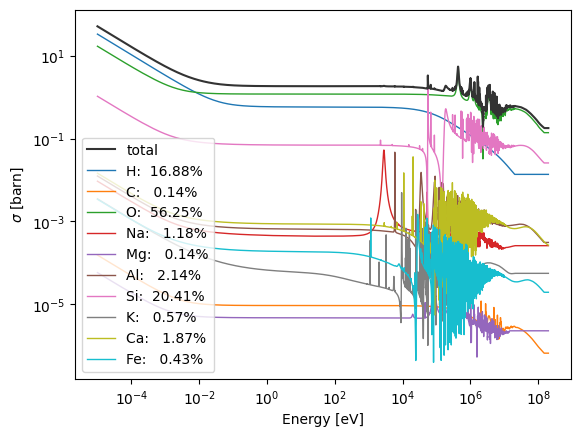

In [31]:
concrete.plot(loglog=True);

In [32]:
concrete.weights

H     0.168753
C     0.001416
O     0.562525
Na    0.011838
Mg    0.001400
Al    0.021354
Si    0.204119
K     0.005656
Ca    0.018674
Fe    0.004264
dtype: float64

In a similar way, differnet elements can be defined

In [33]:
w = nres.CrossSection("Tungsten")

# or

w = nres.CrossSection("W")

In [34]:
w.table

,W,total
energy,,
1.000000e-05,249.038490,249.038490
1.031250e-05,245.240549,245.240549
1.062500e-05,241.611521,241.611521
1.093750e-05,238.139106,238.139106
1.125000e-05,234.812583,234.812583
...,...,...
1.432280e+08,0.875860,0.875860
1.441680e+08,0.870287,0.870287
1.489570e+08,0.841893,0.841893


In case we are interested to keep the isotopic composition, e.g. to include isotopic composition at the fitting model, we can pass `splitby="isotopes"` as a flag. This can be done for "elements" and "materials" as well.

In [35]:
w = nres.CrossSection("W",splitby="isotopes")
w.table

,W180,W182,W183,W184,W186,total
energy,,,,,,
1.000000e-05,1544.057920,1054.511860,519.733830,113.792220,1901.076510,931.014411
1.031250e-05,1520.513560,1038.438410,511.815790,112.077230,1872.051350,916.816297
1.062500e-05,1498.015730,1023.080170,504.249980,110.438800,1844.316430,903.249645
1.093750e-05,1476.489390,1008.385010,497.011020,108.871400,1817.777720,890.268495
1.125000e-05,1455.866670,994.306800,490.076060,107.370070,1792.354210,877.832718
...,...,...,...,...,...,...
1.432280e+08,3.185179,3.345550,3.238949,3.299890,3.276053,3.296354
1.441680e+08,3.167610,3.323411,3.221057,3.279060,3.255063,3.275556
1.489570e+08,3.078103,3.210622,3.129904,3.172938,3.148123,3.169597


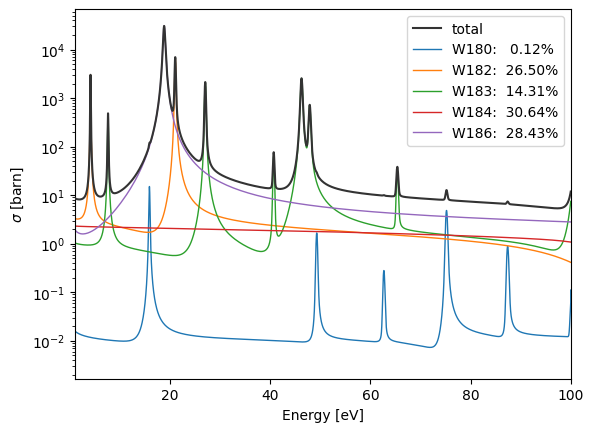

In [36]:
w.plot(xlim=(1,100),logy=True);

## Combining sample materials
combining different samples is super easy with `nres`, just add the CrossSection objects together with the `total_weight` (that is the relative weight) of each component can be added directly in the material definition or as a multiplication operation.

In [37]:
gold = nres.CrossSection("gold",total_weight=0.1)
zns = nres.CrossSection(nres.materials["ZnS(Ag):LiF 95wt% 6Li PHOSPHOR POWDER Neutron Detectors"],
                                      short_name="ZnS",total_weight=0.9)

In [38]:
golden_zns = gold + zns

# or

golden_zns = 0.5*gold + 0.8*zns

In [39]:
golden_zns.table

,Zn,S,F,Li,total
energy,,,,,
1.000000e-05,12.469872,16.449118,2.915377,2612.780166,153.983581
1.024150e-05,12.323785,16.255472,2.880969,2581.951478,152.167363
1.031250e-05,12.280836,16.198541,2.871206,2572.887971,151.633421
1.048300e-05,12.182293,16.067906,2.847759,2552.090170,150.408149
1.062500e-05,12.100223,15.959108,2.829210,2534.768835,149.387740
...,...,...,...,...,...
1.962500e+07,0.466641,0.831426,0.108499,0.065959,0.588429
1.973000e+07,0.465749,0.833513,0.108443,0.065781,0.588949
1.975000e+07,0.465579,0.833911,0.108432,0.065747,0.589048


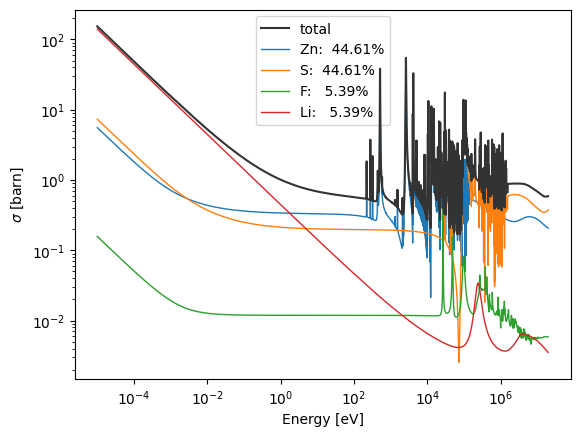

In [40]:
golden_zns.plot(loglog=True);

# Loading Data in nres

## Data Format Requirements

`nres` requires transmission data to be in a specific format:

- Data should be a `pandas.DataFrame`
- The DataFrame must have 3 columns: "energy", "trans", and "err"

## Using `nres.Data` for Standardized Data Loading

To simplify data loading and ensure standardization, we recommend using the `nres.Data` object. This object provides convenient methods for different data loading scenarios:

1. `.from_counts()`: Load data from signal and open beam measurements
2. `.from_transmission()`: Load data from pre-calculated transmission files (e.g., SAMMY twenty format .dat files)

## Demo Dataset: Silicon Fast Neutron Absorption

For this demo, we'll use a silicon fast neutron absorption measurement dataset:

- Originally measured at the ORELA 200 meters beamline
- Now part of the SAMMY examples database
- Available [here](https://code.ornl.gov/RNSD/SAMMY/-/blob/master/samexm/samexm/ex012/ex012a.dat)

## Loading the Data

We'll use the `nres.Data.from_transmission()` method to load our demo dataset:

In [41]:
data = nres.Data.from_transmission("silicon.dat")

# or

data = nres.Data.from_transmission("https://code.ornl.gov/RNSD/SAMMY/-/raw/master/samexm/samexm/ex012/ex012a.dat")

This method automatically formats the data into the required DataFrame structure.

## Next Steps

After loading the data, you can proceed with:
- Inspecting the data structure by using the `.table` method
- Plotting the raw data by using the `.plot` method

In the next sections, we'll explore these steps in detail.

In [42]:
# inspect the data table
data.table

,energy,trans,err
0,300003.47,0.229250,0.013387
1,300026.00,0.221532,0.012845
2,300048.59,0.230264,0.013092
3,300071.16,0.232874,0.013579
4,300093.69,0.241958,0.014082
...,...,...,...
15731,1798500.12,0.539203,0.009406
15732,1798831.38,0.535882,0.009333
15733,1799163.12,0.543508,0.009419
15734,1799494.75,0.536750,0.009224


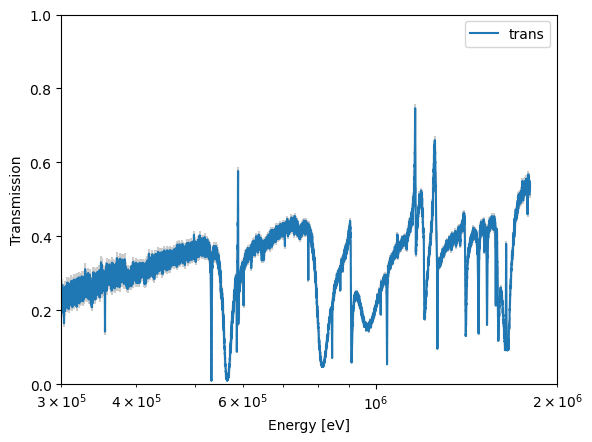

In [43]:
# plot the data
data.plot(xlim=(3e5,2e6));

# Defining a Transmission Model

In this section, we'll define a transmission model using the cross-section object as an input. We'll also add details about the response function, requested background parameterization, and model free parameters.

## Creating the Basic Model

We'll use the `nres.TransmissionModel` class to create our model:


In [44]:
# load Silicon cross section
xs = nres.CrossSection("Silicon")

# load this in the transmission model
model = nres.TransmissionModel(xs)

The `TransmissionModel` is built on top of the `lmfit.Model` class, which provides convenient functionality for handling fit parameters.

By default, `nres` provides a minimal set of parameters including:
- Sample thickness (in cm)
- Normalization factor

You can view the current fit parameters and their assigned values using:

```python
model.params
```

In [45]:
# check the model parameters that were set automatically
model.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True


We can set parameters or change flags at this point, e.g. we know that the thickness is anywhere between 0-5 cm so we can set a range for that parameter. We also set the norm parameter as fixed

In [46]:
model.params["thickness"].set(min=0,max=5)
model.params.set(norm=dict(vary=False))
# check the change in the params
model.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,0.00000000,5.00000000,True
norm,1.00000000,None,-inf,inf,False


## Extending the Model

### Adding TOF Correction Parameters

For time-of-flight (TOF) measurements, we often need to account for:
1. Electronic time delay ($t_0$)
2. Uncertainty in flight-path-length ($L$)

To include these TOF calibration parameters, we can use the `vary_tof` argument when defining the model:

```python
model = nres.TransmissionModel(xs, vary_tof=True)
```

This adds two extra parameters to the model:
- `t0`: Time delay
- `L0`: Flight path length correction

In later sections, we'll explore how to extend the transmission model further to include other free parameters such as response functions and background parameterizations.


In [47]:
model_with_tof = nres.TransmissionModel(xs,vary_tof=True)

model_with_tof.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True
L0,1.00000000,1.0,0.50000000,1.50000000,True
t0,0.00000000,0.0,-inf,inf,True


## Adding Background

You can add a background component to your model. The default background parameterization includes 3 parameters, but you can choose from three background types:

1. "constant"
2. "polynomial3"
3. "polynomial5"

Example:

In [48]:
model_with_bg = nres.TransmissionModel(xs,vary_background=True)

model_with_bg.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True
b0,0.00000000,0.0,-inf,inf,True
b1,0.00000000,0.0,-inf,inf,True
b2,0.00000000,0.0,-inf,inf,True


In [49]:
# example with 5 background parameters
model_with_bg = nres.TransmissionModel(xs,background="polynomial5",vary_background=True)

# you can set some of the background parameters as fixed
model_with_bg.params.set(b3=dict(vary=False),
                         b4=dict(vary=False))

model_with_bg.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True
b0,0.00000000,0.0,-inf,inf,True
b1,0.00000000,0.0,-inf,inf,True
b2,0.00000000,0.0,-inf,inf,True
b3,0.00000000,0.0,-inf,inf,False
b4,0.00000000,0.0,-inf,inf,False


## Incorporating Response Function

To account for instrumental effects, you can add a response function to your model. The response function is provided by the `nres.Response` object.

Currently, only one type is implemented: the "expo-gauss" response function. This is a parameterized combination of an exponential and a Gaussian function.

To add the response to your model, use the `vary_response` flag:

In [79]:
# add response to the model
model_with_response = nres.TransmissionModel(xs,vary_response=True)

model_with_response.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True
K,1.00000000,1.0,1.0000e-04,inf,True
x0,1.0000e-09,1e-09,-inf,inf,True
τ,1.0000e-09,1e-09,1.0000e-10,inf,True


The default response is the `exponorm` function which is a gaussian with an exponential tail.

You can check out the response function using the `model.response.plot` method

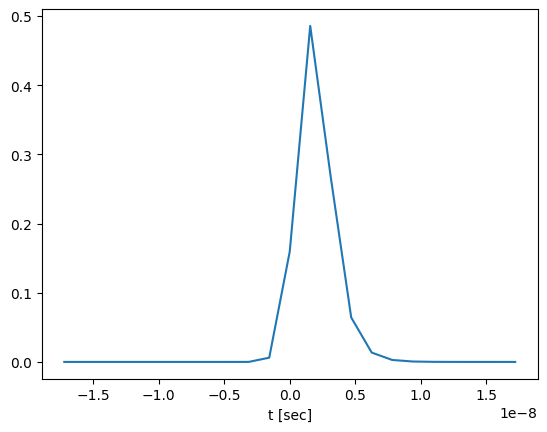

In [80]:
model_with_response.response.plot()

## Varying Composition Weights

You can allow the model to adjust the composition weights of materials, elements, or isotopes within your sample definition. This is particularly useful when the exact composition is uncertain.

Enable this option by setting `vary_weights` to True.

To demonstrate this option, you can use the `splitby` method in the cross-section definition:

In [60]:
# load Silicon cross section and splitby isotopes
xs = nres.CrossSection("Silicon",splitby="isotopes")

# this will be the natural abundance composition of silicon isotopes
xs.weights

Si28    0.92223
Si29    0.04685
Si30    0.03092
dtype: float64

This allows the model to adjust the relative proportions of Si isotopes in the sample.

In [71]:
# define a model with vary_weights=True
model_with_weights = nres.TransmissionModel(xs,vary_weights=True,vary_background=True)

model_with_weights.params

name,value,initial value,min,max,vary,expression
thickness,1.00000000,None,-inf,inf,True,
norm,1.00000000,None,-inf,inf,True,
p1,3.39539143,3.395391426428625,-14.0000000,14.0000000,True,
p2,0.41554778,0.4155477849652101,-14.0000000,14.0000000,True,
Si28,0.92223000,None,-inf,inf,False,exp(p1) / (1 + exp(p1) + exp(p2))
Si29,0.04685000,None,-inf,inf,False,exp(p2) / (1 + exp(p1) + exp(p2))
Si30,0.03092000,None,-inf,inf,False,1 / (1 + exp(p1) + exp(p2))
b0,0.00000000,0.0,-inf,inf,True,
b1,0.00000000,0.0,-inf,inf,True,
b2,0.00000000,0.0,-inf,inf,True,


# Fitting the Model

Once you've set up your model and parameters, fitting is straightforward using the `model.fit` method. You can also specify energy bounds for the fit:

```python
result = model.fit(data, emin=1, emax=300)
```

Here:
- `data` is your measured transmission data
- `emin` and `emax` define the energy range for fitting

After fitting, you can examine the results using methods like `result.fit_report()` or by plotting the fit alongside your data.

In [75]:
result = model_with_weights.fit(data,emin=0.4e6,emax=1.7e6)

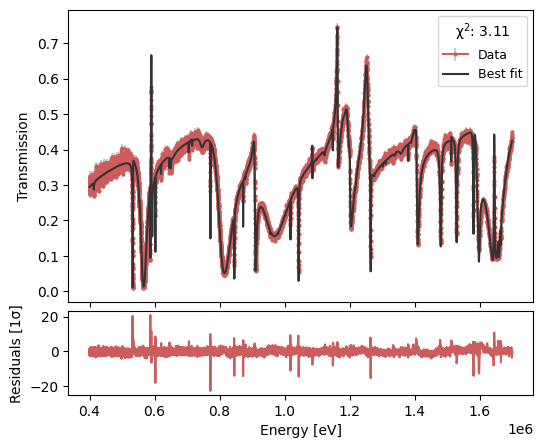

In [76]:
# plot result
result.plot(plot_bg=False,color="indianred");

In [78]:
# show best fit parameters
result